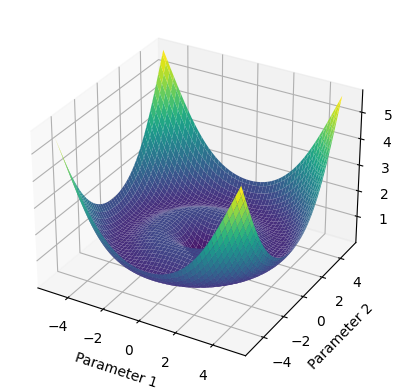

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Simulate a simple loss landscape using a Gaussian mixture model
def loss_function(obs_tup):
    return (obs_tup[2] - (obs_tup[0] + obs_tup[1]))**2

# Generate a grid of points
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Compute the loss at each point
Z = loss_function(X, Y)

# Create a 3D plot of the energy landscape
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('Parameter 1')
ax.set_ylabel('Parameter 2')
ax.set_zlabel('Loss')
plt.show()


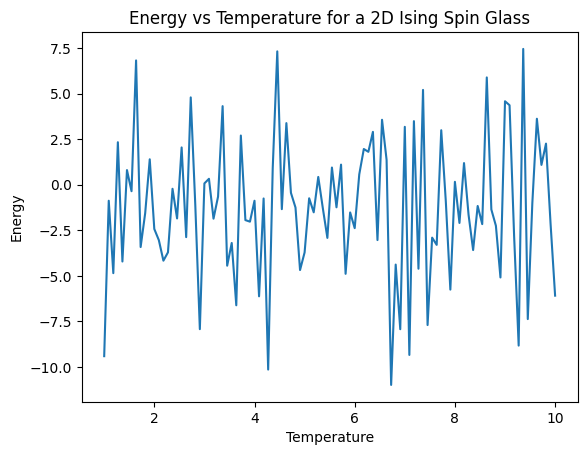

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Initialize a 2D spin glass model
L = 4  # Lattice size (4x4 grid)
spins = np.random.choice([-1, 1], size=(L, L))  # Random initial configuration
J = np.random.randn(L, L)  # Random interaction strengths (normally distributed)

# Define the Hamiltonian (energy function)
def compute_energy(spins, J):
    energy = 0
    for i in range(L):
        for j in range(L):
            # Sum nearest-neighbor interactions (periodic boundary conditions)
            energy -= J[i, j] * spins[i, j] * (spins[(i + 1) % L, j] + spins[i, (j + 1) % L])
    return energy

# Metropolis algorithm (Monte Carlo simulation)
def metropolis_step(spins, J, T):
    i, j = np.random.randint(0, L, size=2)  # Pick a random spin
    dE = 2 * spins[i, j] * (J[i, j] * (spins[(i + 1) % L, j] + spins[i, (j + 1) % L]))
    if dE < 0 or random.random() < np.exp(-dE / T):  # Metropolis criterion
        spins[i, j] *= -1  # Flip the spin
    return spins

# Simulate the energy landscape at different temperatures
temperatures = np.linspace(1, 10, 100)
energies = []

for T in temperatures:
    spins = np.random.choice([-1, 1], size=(L, L))  # Reset configuration
    for _ in range(1000):  # Monte Carlo steps
        spins = metropolis_step(spins, J, T)
    energy = compute_energy(spins, J)
    energies.append(energy)

# Plot the energy as a function of temperature
plt.plot(temperatures, energies)
plt.xlabel('Temperature')
plt.ylabel('Energy')
plt.title('Energy vs Temperature for a 2D Spin Glass')
plt.show()
